In [1]:
import os
import sys

proj_root = os.getcwd() + "/.."
os.chdir(proj_root)
sys.path.append(proj_root)

In [2]:
from scipy import stats
class Clipping:
    """Clip image"""

    def __init__(self, percentile=99, per_channel=False):
        self.percentile = percentile
        self.per_channel = per_channel

    def __call__(self, image):
        image_copy = image.copy()
        for i in range(4):
            number = np.percentile(image_copy[:,:,i].flatten(), self.percentile)
            print(stats.describe(image_copy[:,:,i].flatten()))
            image_copy[image_copy[:,:,i] > number] = 0
            print(stats.describe(image_copy[:,:,i].flatten()))
        # print(stats.describe(image_copy.flatten()))

        return image_copy

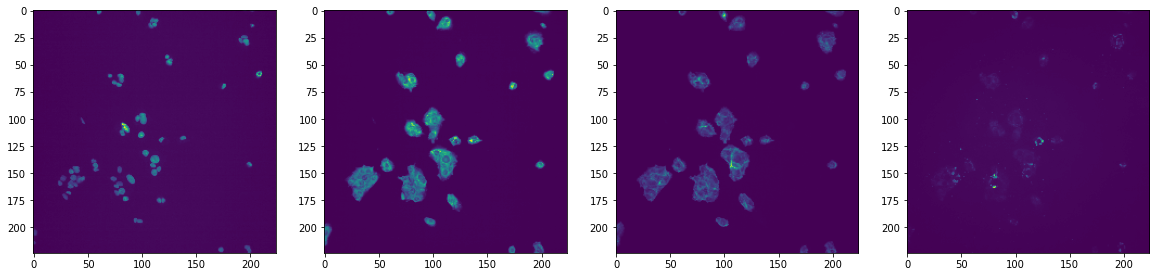

DescribeResult(nobs=50176, minmax=(77.0, 2860.0), mean=149.43344, variance=19942.963, skewness=7.877810478210449, kurtosis=73.7809292859163)
DescribeResult(nobs=50176, minmax=(0.0, 996.0), mean=136.45326, variance=5880.3916, skewness=7.575854301452637, kurtosis=65.39541150029952)
DescribeResult(nobs=50176, minmax=(0.0, 11097.0), mean=401.92014, variance=1047294.0, skewness=4.684177875518799, kurtosis=23.37452384874472)
DescribeResult(nobs=50176, minmax=(0.0, 5711.0), mean=333.4246, variance=618844.0, skewness=4.65047025680542, kurtosis=21.49857127293742)
DescribeResult(nobs=50176, minmax=(0.0, 20989.0), mean=379.3307, variance=977663.75, skewness=6.121531009674072, kurtosis=55.331060742099375)
DescribeResult(nobs=50176, minmax=(0.0, 4994.0), mean=309.17218, variance=471837.3, skewness=4.4694366455078125, kurtosis=19.894820681597988)
DescribeResult(nobs=50176, minmax=(0.0, 15988.0), mean=423.5766, variance=81951.625, skewness=20.29890251159668, kurtosis=747.6661757305302)
DescribeResult

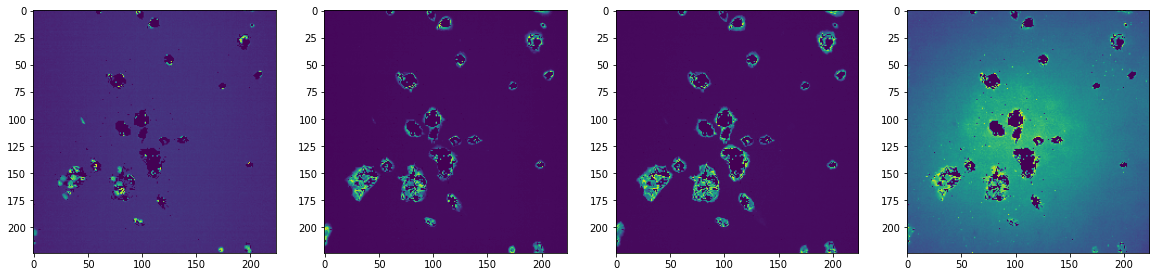

In [3]:
import matplotlib.pyplot as plt
import cv2
from src.models.CellPaintingDataset import CellPaintingDataset
from src.models.config import Config
import numpy as np
import torchvision.transforms as transforms


def display_image(image):
    plt.rcParams['figure.figsize'] = (20, 20)
    f, axarr = plt.subplots(1, 4)
    axarr[0].imshow(image[:, :, 0])
    axarr[1].imshow(image[:, :, 1])
    axarr[2].imshow(image[:, :, 2])
    axarr[3].imshow(image[:, :, 3])

    plt.show()


config = Config()


dataset = CellPaintingDataset(
    config.data_root_dir, config.dataset_metadata)
image = dataset[0]
# print(image)
display_image(image[0])
clipping = Clipping(percentile=99)
display_image(clipping(image[0]))